In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [5]:
from google.colab import files
files.upload()

Saving OnlineRetails.csv to OnlineRetails.csv


In [6]:
df = pd.read_csv('OnlineRetails.csv',encoding= 'unicode_escape')


In [7]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# selecting only notna details
df = df[df['CustomerID'].notna()]

In [9]:
# since the data is huge for analysis, we are just considering 20000 records for our analysis purpose.
df_sel = df.sample(20000,random_state=42)


In [11]:
df_sel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,1/7/2011 12:14,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,9/15/2011 13:51,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,8/3/2011 10:10,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,9/4/2011 13:56,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,9/8/2011 12:20,0.55,15144.0,United Kingdom


In [12]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 47912 to 166372
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    20000 non-null  object 
 1   StockCode    20000 non-null  object 
 2   Description  20000 non-null  object 
 3   Quantity     20000 non-null  int64  
 4   InvoiceDate  20000 non-null  object 
 5   UnitPrice    20000 non-null  float64
 6   CustomerID   20000 non-null  float64
 7   Country      20000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [13]:
# Note InoviceDate is an Object Type and not Date Type

In [14]:
df_sel.shape

(20000, 8)

In [15]:
# we have successfully extracted the random sample data for 20000 records
# Let move on to data cleaning
# since we need to categorize the customer based on shopping experience, we will need the timestamp
# Timestamp is available but we need only the date data for analysis.
# Hence, we will clean the data field and then will move ahead with analyze data along with below factors
# Last transaction, Order Frequency and total shopping

In [16]:
# Cleaning data for date
from datetime import datetime
df_sel["InvoiceDate"] = pd.to_datetime(df_sel["InvoiceDate"])


In [17]:
df_sel["InvoiceDate"]

47912    2011-01-07 12:14:00
342630   2011-09-15 13:51:00
288183   2011-08-03 10:10:00
325368   2011-09-04 13:56:00
331450   2011-09-08 12:20:00
                 ...        
64239    2011-01-19 16:18:00
373369   2011-10-03 12:47:00
412598   2011-10-23 13:10:00
7287     2010-12-03 16:35:00
166372   2011-04-21 13:29:00
Name: InvoiceDate, Length: 20000, dtype: datetime64[ns]

In [18]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 47912 to 166372
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    20000 non-null  object        
 1   StockCode    20000 non-null  object        
 2   Description  20000 non-null  object        
 3   Quantity     20000 non-null  int64         
 4   InvoiceDate  20000 non-null  datetime64[ns]
 5   UnitPrice    20000 non-null  float64       
 6   CustomerID   20000 non-null  float64       
 7   Country      20000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [19]:
# Note: InvoiceDate field is in Datetime format now.
# this will help us to extract only date data

In [20]:
df_sel["InvoiceDate"] = df_sel["InvoiceDate"].dt.date

In [21]:
df_sel["InvoiceDate"]

47912     2011-01-07
342630    2011-09-15
288183    2011-08-03
325368    2011-09-04
331450    2011-09-08
             ...    
64239     2011-01-19
373369    2011-10-03
412598    2011-10-23
7287      2010-12-03
166372    2011-04-21
Name: InvoiceDate, Length: 20000, dtype: object

In [22]:
# Total Value of shopping 
df_sel["TotalSum"] = df_sel["Quantity"] * df_sel["UnitPrice"]
df_sel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07,7.95,13534.0,United Kingdom,15.9
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15,3.95,14894.0,United Kingdom,15.8
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03,0.85,12921.0,United Kingdom,-3.4
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04,1.65,17229.0,United Kingdom,6.6
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08,0.55,15144.0,United Kingdom,13.2


In [23]:
# Recent purchased date
import datetime
Rec_Date = max(df_sel.InvoiceDate) + datetime.timedelta(days=1)

In [24]:
Rec_Date

datetime.date(2011, 12, 10)

In [25]:
df_sel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07,7.95,13534.0,United Kingdom,15.9
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15,3.95,14894.0,United Kingdom,15.8
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03,0.85,12921.0,United Kingdom,-3.4
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04,1.65,17229.0,United Kingdom,6.6
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08,0.55,15144.0,United Kingdom,13.2


In [26]:
# at this point we have Date field without time, we have total row value and Recent shopping date.
# Lets create a new table dataframe with data required for further analysis

In [27]:
# Creating or grouping the data of customer 
Summarized = df_sel.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x:(Rec_Date - x.max()).days,
    'InvoiceNo':'count',
    'TotalSum':'sum'})

In [28]:
Summarized.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12347.0,40,11,233.40
12348.0,249,4,282.64
12349.0,19,4,338.55
12352.0,37,10,164.90
12353.0,205,1,17.70


In [29]:
#Reneming the column name for better understanding
Summarized.rename(columns = {"InvoiceDate":"Last_Purchased",
                             "InvoiceNo":"Order_Frequency",
                             "TotalSum": "Total_Purchase"},inplace=True)

In [30]:
Summarized.head()

,Last_Purchased,Order_Frequency,Total_Purchase
CustomerID,,,
12347.0,40,11,233.40
12348.0,249,4,282.64
12349.0,19,4,338.55
12352.0,37,10,164.90
12353.0,205,1,17.70


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

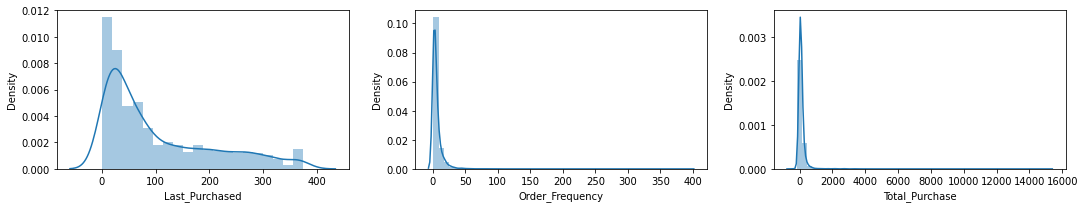

In [31]:
# Lets analyze the data and check if needs normalization, before we proceed 

fig,ax =  plt.subplots(1,3, figsize=(15,3))
sns.distplot(Summarized['Last_Purchased'],ax=ax[0])
sns.distplot(Summarized['Order_Frequency'],ax=ax[1])
sns.distplot(Summarized['Total_Purchase'],ax=ax[2])
plt.tight_layout()
plt.show()

In [32]:
# We observe that all data has skewness
# Lets check other methods to manage the skewnwess
# Log Transformation, Square Root Transformatoin, Cube root Transformation, Box Cox Transformation


In [33]:
def skewmanager(x):
  fig, ax = plt.subplots(2,2,figsize=(5,5))
  sns.distplot(Summarized[x],ax=ax[0,0])
  sns.distplot(np.log(Summarized[x]),ax=ax[0,1])
  sns.distplot(np.sqrt(Summarized[x]),ax=ax[1,0])
  sns.distplot(stats.boxcox(Summarized[x])[0],ax=ax[1,1])
  plt.tight_layout()
  plt.show()

  print("Normal Skew Value : ",Summarized[x].skew().round(2)) #limiting the output to 2 decimals
  print("Log Value :",np.log(Summarized[x]).skew().round(2))
  print("Square Root Value :",np.sqrt(Summarized[x]).skew().round(2))
  print("Box Cox Value :",pd.Series(stats.boxcox(Summarized[x])[0]).skew().round(2))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

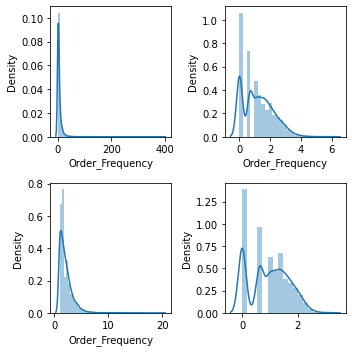

Normal Skew Value :  16.31
Log Value : 0.56
Square Root Value : 3.49
Box Cox Value : 0.08


In [34]:
skewmanager('Order_Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

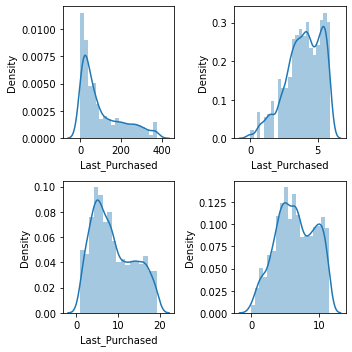

Normal Skew Value :  1.07
Log Value : -0.59
Square Root Value : 0.46
Box Cox Value : -0.08


In [35]:
skewmanager('Last_Purchased')

In [36]:
# "CLOSER THE VALUE TO 0 - VARIABLE TENDS TO HAVE SYMMETRICAL FORM"
# Basis this statement, will go ahead with BoxCox

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


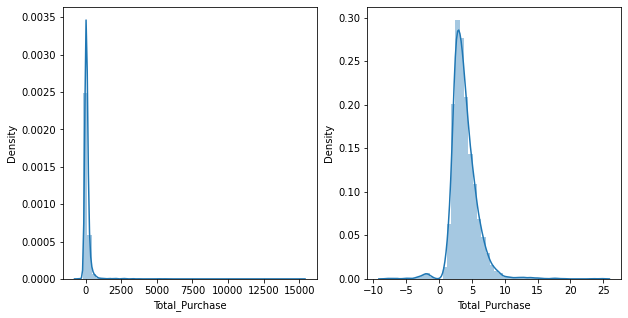

Normal Skew Value :  20.2
Cube Root Value : 1.57


In [37]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(Summarized['Total_Purchase'],ax=ax[0])
sns.distplot(np.cbrt(Summarized['Total_Purchase']),ax=ax[1])
plt.show()

print("Normal Skew Value : ",Summarized['Total_Purchase'].skew().round(2))
print("Cube Root Value :",np.cbrt(Summarized['Total_Purchase']).skew().round(2))

In [38]:
Summarized_Rev = pd.DataFrame()
Summarized_Rev['Last_Purchased'] = stats.boxcox(Summarized['Last_Purchased'])[0]
Summarized_Rev['Order_Frequency'] = stats.boxcox(Summarized['Order_Frequency'])[0]
Summarized_Rev['Total_Purchase'] = pd.Series(np.cbrt(Summarized['Total_Purchase'])).values
Summarized_Rev.head()

,Last_Purchased,Order_Frequency,Total_Purchase
0,5.506230,1.802130,6.156969
1,10.218570,1.170996,6.562629
2,4.038481,1.170996,6.969596
3,5.341843,1.749260,5.483698
4,9.629798,0.000000,2.606100


In [39]:
Summarized_Rev.tail()

,Last_Purchased,Order_Frequency,Total_Purchase
3333,1.231730,2.082074,7.101382
3334,3.940329,0.960278,2.474406
3335,9.264879,0.000000,2.482545
3336,1.602634,2.396546,5.062157
3337,5.661083,1.539808,5.245362


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Summarized_Rev)
Summarized_Normal = scaler.transform(Summarized_Rev)
print("Mean : ",Summarized_Normal.mean(axis=0).round(2))
print("Standard :",Summarized_Normal.std(axis=0).round(2))

Mean :  [-0. -0.  0.]
Standard : [1. 1. 1.]


In [41]:
pd.DataFrame(Summarized_Normal).head()

,0,1,2
0,-0.363650,1.201912,1.127725
1,1.285207,0.308491,1.326667
2,-0.877218,0.308491,1.526251
3,-0.421169,1.127071,0.797541
4,1.079195,-1.349146,-0.613681


In [42]:
# CHOOSING K-NUMBER

In [43]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(Summarized_Normal)
    sse[k] = kmeans.inertia_


In [44]:
sse

{1: 10013.999999999998,
 2: 5740.05222716786,
 3: 4604.144377316879,
 4: 3783.509552596783,
 5: 3172.7038653415198,
 6: 2765.3710378584688,
 7: 2499.473314752279,
 8: 2224.270987589289,
 9: 2019.895022290605,
 10: 1874.5271143022815}

In [45]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<function matplotlib.pyplot.show>

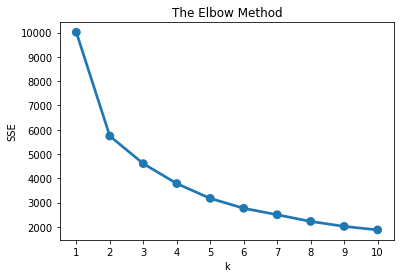

In [46]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show

In [47]:
# at the value of 3 the drop becomes steady, hence consider the k=3
model = KMeans(n_clusters=3, random_state=42)
model.fit(Summarized_Normal)
model.labels_.shape

(3338,)

**Clustering**

In [48]:
Summarized["Cluster"] = model.labels_
Summarized.head()

,Last_Purchased,Order_Frequency,Total_Purchase,Cluster
CustomerID,,,,
12347.0,40,11,233.40,0
12348.0,249,4,282.64,2
12349.0,19,4,338.55,0
12352.0,37,10,164.90,0
12353.0,205,1,17.70,2


In [49]:
Summarized.groupby('Cluster').agg({
    'Last_Purchased':'mean',
    'Order_Frequency':'mean',
    'Total_Purchase':['mean','count']}).round(2)

Last_Purchased Order_Frequency Total_Purchase      
                  mean            mean           mean count
Cluster                                                    
0                39.81           13.30         288.67  1100
1                42.45            2.63          30.97  1083
2               220.46            2.18          39.46  1155

In [50]:
df_normalized = pd.DataFrame(Summarized_Normal,columns=['Last_Purchased','Order_Frequency','Total_Purchase'])
df_normalized['ID'] = Summarized.index
df_normalized['Cluster']=model.labels_
df_normalized.head()

,Last_Purchased,Order_Frequency,Total_Purchase,ID,Cluster
0,-0.363650,1.201912,1.127725,12347.0,0
1,1.285207,0.308491,1.326667,12348.0,2
2,-0.877218,0.308491,1.526251,12349.0,0
3,-0.421169,1.127071,0.797541,12352.0,0
4,1.079195,-1.349146,-0.613681,12353.0,2


In [51]:
# Melting the Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars = ['ID','Cluster'],
                      value_vars = ['Last_Purchased','Order_Frequency','Total_Purchase'],
                      var_name ='Attribute',
                      value_name='Value')
      
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,0,Last_Purchased,-0.363650
1,12348.0,2,Last_Purchased,1.285207
2,12349.0,0,Last_Purchased,-0.877218
3,12352.0,0,Last_Purchased,-0.421169
4,12353.0,2,Last_Purchased,1.079195


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


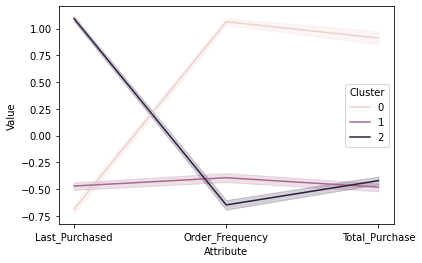

In [52]:
sns.lineplot('Attribute','Value',hue='Cluster',data=df_nor_melt)

In [53]:
Summarized.groupby('Cluster').agg({
    'Last_Purchased':'mean',
    'Order_Frequency':'mean',
    'Total_Purchase':['mean','count']}).round(1)

Last_Purchased Order_Frequency Total_Purchase      
                  mean            mean           mean count
Cluster                                                    
0                 39.8            13.3          288.7  1100
1                 42.4             2.6           31.0  1083
2                220.5             2.2           39.5  1155

In [55]:
cluster_avg = Summarized.groupby('Cluster').mean()
population_avg = Summarized.mean()
relative_imp = cluster_avg/population_avg-1
relative_imp

,Cluster,Last_Purchased,Order_Frequency,Total_Purchase
Cluster,,,,
0,NaN,-0.614153,1.220377,1.429279
1,NaN,-0.588604,-0.561252,-0.739412
2,NaN,1.136819,-0.635999,-0.667899


# <u>//** Final Conclusion **//</u>

**<u>Cluster 0</u> - Are the one who have recently purchased, buy Frequently and spend more. PROBABLY A CLUSTER OF PATRIOTIC CUSTOMERS**

**<u>Cluster 1</u> - Are those who have recently purchased, less frequent and spend less - PROBABLY CLUSTER OF NEW CUSTOMERS**

**<u>Cluster 2</u> - They have not purchased for long time, they are less frequent and purchasing is also less. PROBABLY CLUSTER OF ATTRITED CUSTOMER.**


With this we have successfully categorize users based on their transactions.

References:

https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
